In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

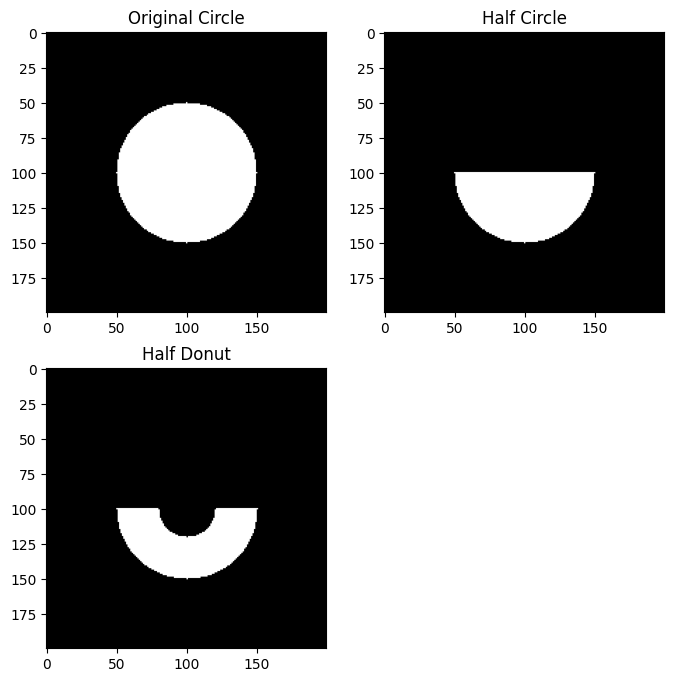

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def generate_circle(radius, center, shape):
    """
    Generate a binary matrix representing a circle.

    Args:
    - radius: Radius of the circle.
    - center: Coordinates of the center of the circle.
    - shape: Shape of the output matrix.

    Returns:
    - circle_matrix: Binary matrix representing the circle.
    """
    circle_matrix = np.zeros(shape, dtype=bool)
    for i in range(shape[0]):
        for j in range(shape[1]):
            if (i - center[0])**2 + (j - center[1])**2 <= radius**2:
                circle_matrix[i, j] = 1
    return circle_matrix



def crop_with_smaller_circle(matrix, smaller_radius, center):
    """
    Crop the input matrix using a smaller circle.

    Args:
    - matrix: Input binary matrix.
    - smaller_radius: Radius of the smaller circle.
    - center: Coordinates of the center of the smaller circle.

    Returns:
    - cropped_matrix: Output matrix after cropping with the smaller circle.
    """
    cropped_matrix = np.copy(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if (i - center[0])**2 + (j - center[1])**2 > smaller_radius**2:
                cropped_matrix[i, j] = 0
    return cropped_matrix

def subtract_circle2(matrix, smaller_radius, center):
    """
    Subtract a smaller circle from the input matrix.

    Args:
    - matrix: Input binary matrix.
    - smaller_radius: Radius of the smaller circle.
    - center: Coordinates of the center of the smaller circle.

    Returns:
    - result_matrix: Output matrix after subtracting the smaller circle.
    """
    result_matrix = np.copy(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if (i - center[0])**2 + (j - center[1])**2 <= smaller_radius**2:
                result_matrix[i, j] = 0
    return result_matrix

def subtract_circle(matrix, smaller_radius, center):
    """
    Subtract a smaller circle from the input matrix.

    Args:
    - matrix: Input binary matrix.
    - smaller_radius: Radius of the smaller circle.
    - center: Coordinates of the center of the smaller circle.

    Returns:
    - result_matrix: Output matrix after subtracting the smaller circle.
    """
    # Create a grid of coordinates
    x, y = np.meshgrid(np.arange(matrix.shape[1]), np.arange(matrix.shape[0]))
    
    # Calculate distances from each point to the center
    distances = (x - center[1])**2 + (y - center[0])**2
    
    # Set pixels within the smaller circle radius to 0
    result_matrix = np.copy(matrix)
    result_matrix[distances <= smaller_radius**2] = 0
    
    return result_matrix

# Define parameters
circle_radius = 50
circle_center = (100, 100)
matrix_shape = (200, 200)
smaller_circle_radius = 40
smaller_circle_center = (100, 100)

# Generate the circle matrix
circle_matrix = generate_circle(circle_radius, circle_center, matrix_shape)

# Cut the upper half
half_circle_matrix = cut_upper_half(circle_matrix)

# Crop with a smaller circle
# cropped_half_circle = crop_with_smaller_circle(half_circle_matrix, smaller_circle_radius, smaller_circle_center)

# Subtract another circle to make a half donut
half_donut_matrix = subtract_circle(half_circle_matrix, smaller_circle_radius - 20, smaller_circle_center)

# Plotting
plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.imshow(circle_matrix, cmap='gray')
plt.title('Original Circle')

plt.subplot(222)
plt.imshow(half_circle_matrix, cmap='gray')
plt.title('Half Circle')


plt.subplot(223)
plt.imshow(half_donut_matrix, cmap='gray')
plt.title('Half Donut')

plt.show()


C:\Users\garciaba\AppData\Local\Temp\ipykernel_17292\766371054.py:8: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x, beta, lims: lims[0] + np.diff(lims) / (1 + np.exp(-beta * x))


0.12 0.27 0.25
0.16 0.3 0.28
0.22 0.31 0.32
0.29 0.38 0.36
0.37 0.43 0.41
0.45 0.46 0.47
0.55 0.54 0.53
0.63 0.5700000000000001 0.59
0.71 0.62 0.64
0.78 0.69 0.68
0.84 0.7 0.72
0.88 0.73 0.75


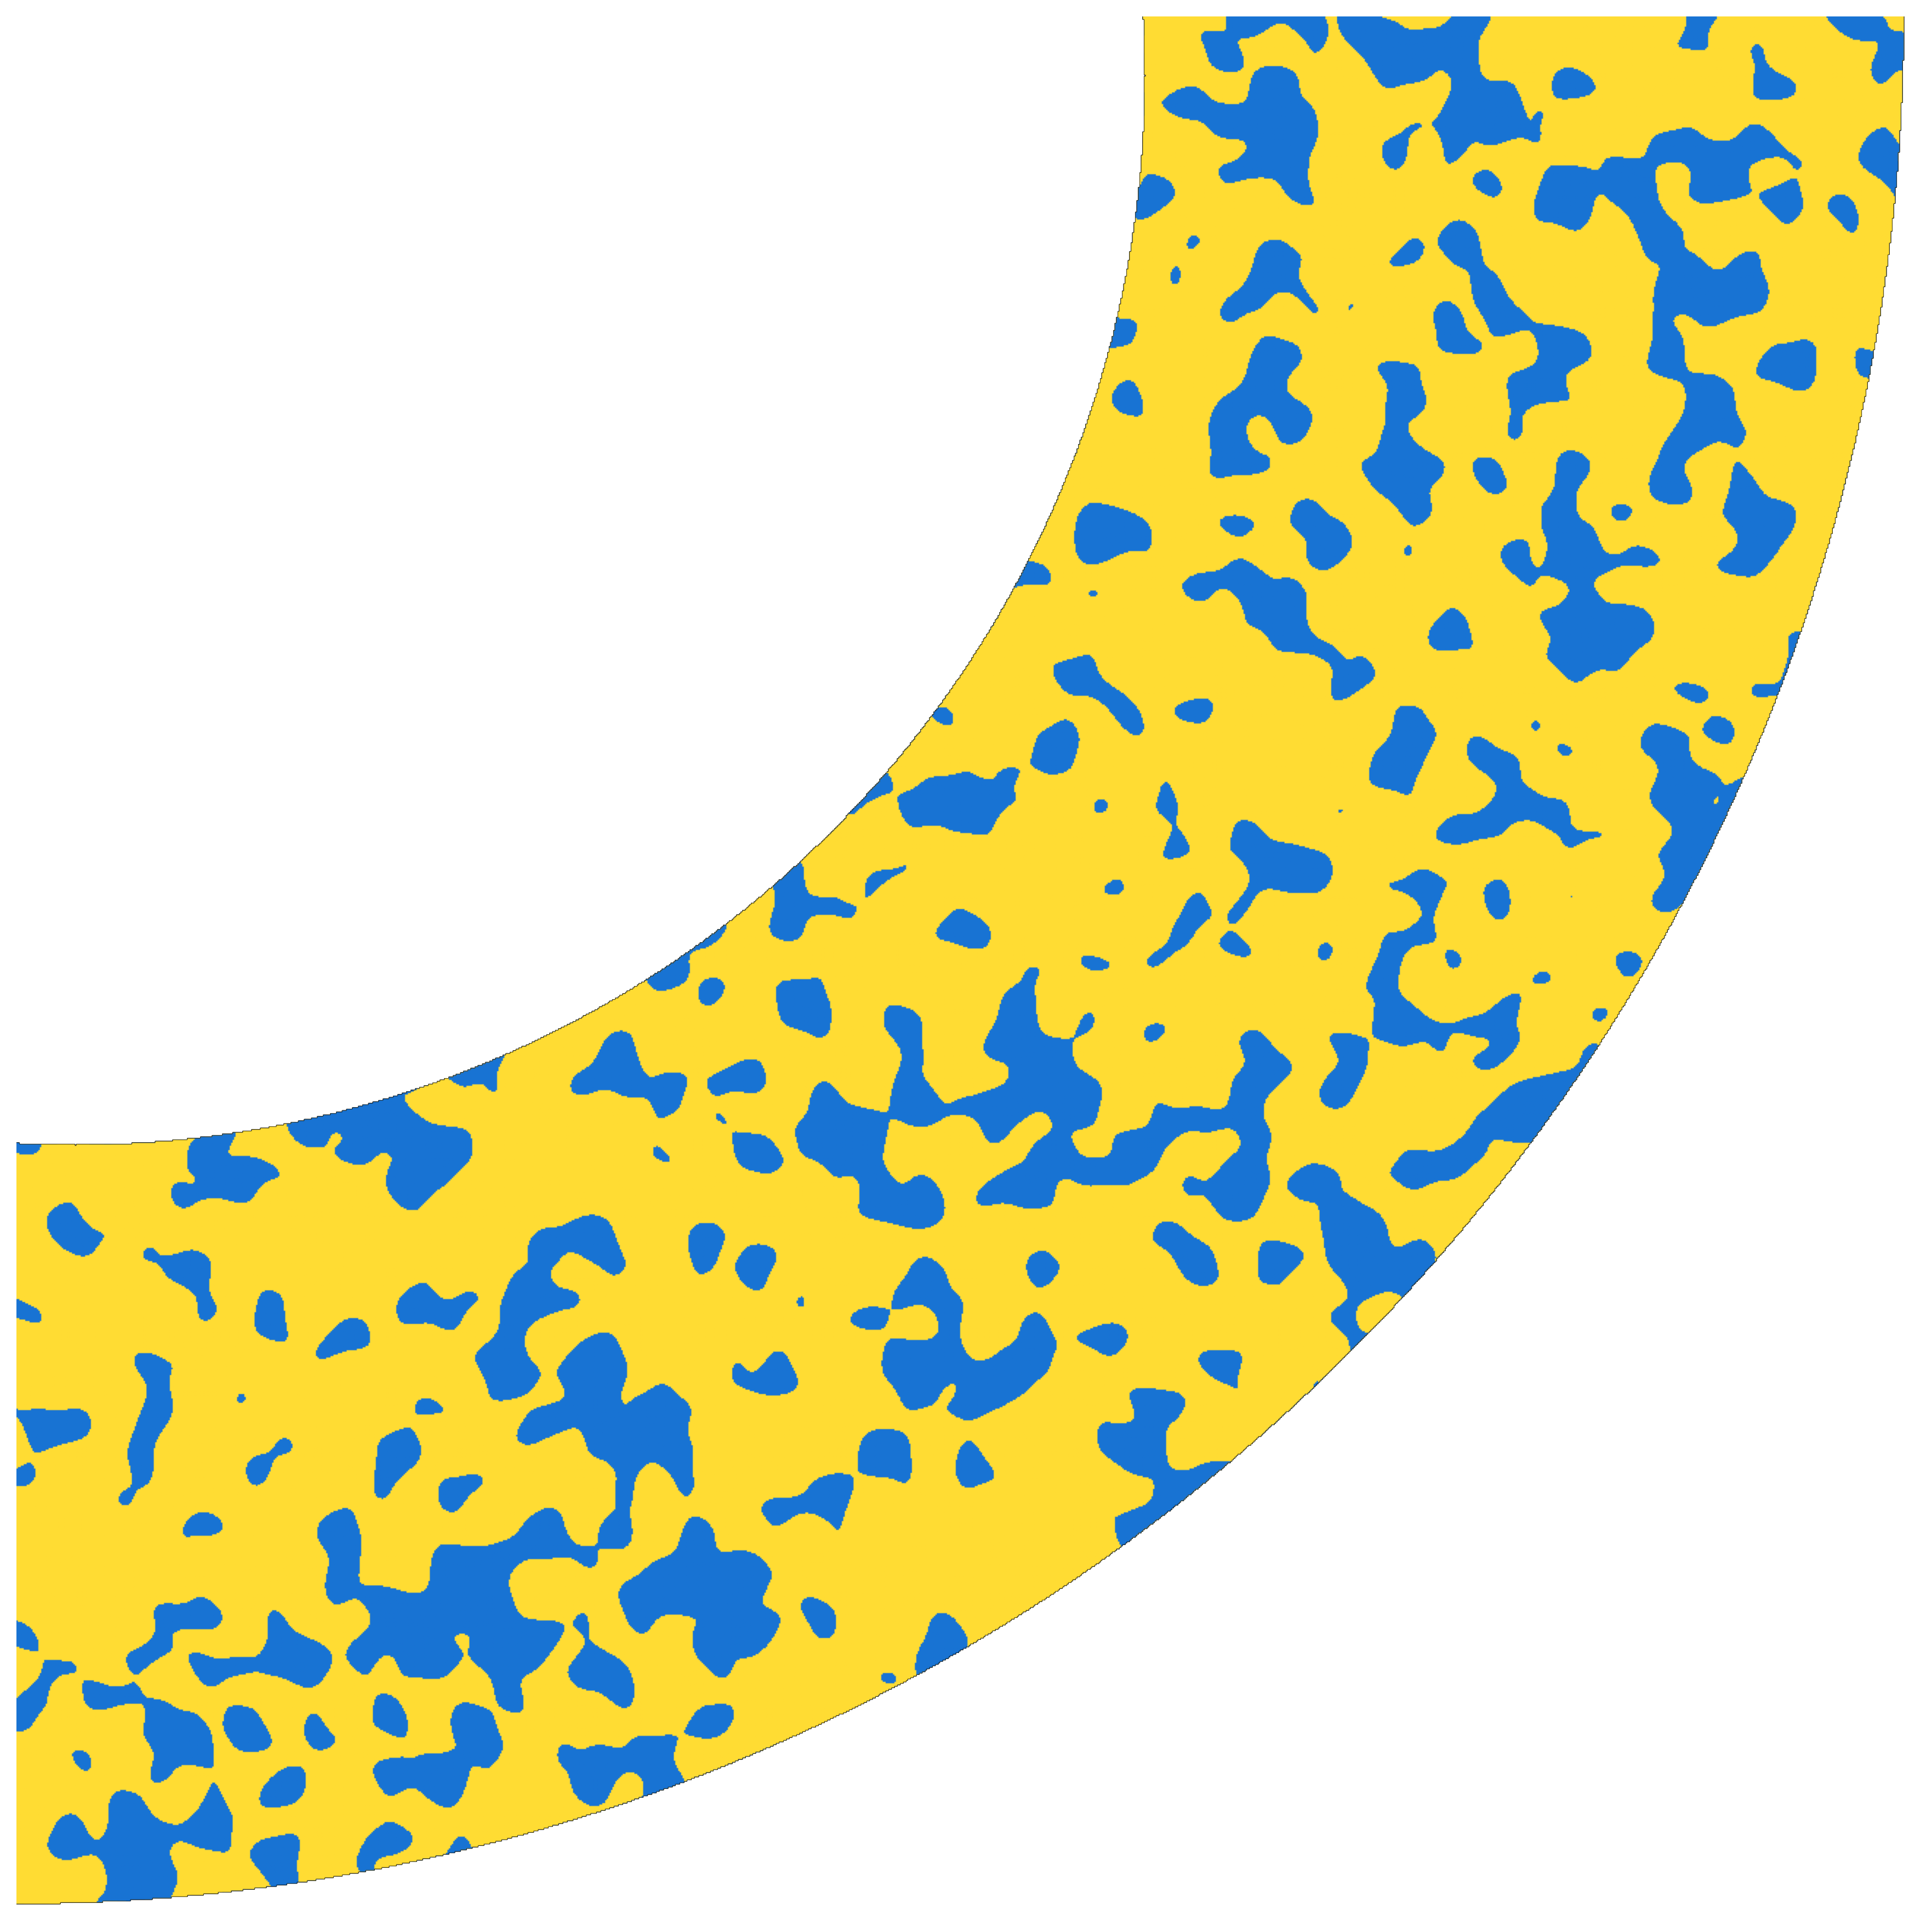

In [3]:
from scipy.optimize import root_scalar, fsolve
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_circular_aperture(diameter=10):
    sigmoid = lambda x, beta, lims: lims[0] + np.diff(lims) / (1 + np.exp(-beta * x))

    diameter = int(np.floor(diameter / 2) * 2)
    x, y = np.meshgrid(np.arange(1, diameter + 1) - (diameter + 1) / 2, np.arange(1, diameter + 1) - (diameter + 1) / 2)

    patch = sigmoid(np.sqrt(x ** 2 + y ** 2) - diameter / 2, np.log(99), [1, 0])

    return patch


def remove_uncovered_area(matrix, circle_radius=10, circle_center=(300, 300)):
    """
    Remove the area not covered by the circle from the input matrix.

    Args:
    - matrix: Input binary matrix.
    - circle_radius: Radius of the circle.
    - circle_center: Coordinates of the center of the circle.

    Returns:
    - result_matrix: Output matrix after removing the uncovered area.
    """
    # Create a binary matrix representing the entire area
    binary_matrix = np.ones_like(matrix, dtype=bool)
    
    # Generate the circle matrix
    circle_matrix = generate_circle(circle_radius, circle_center, matrix.shape)
    
    # Subtract the circle matrix from the binary matrix
    uncovered_area = np.logical_xor(binary_matrix, circle_matrix) #binary_matrix - circle_matrix
    
    # Remove the uncovered area from the input matrix
    result_matrix = np.copy(matrix)
    result_matrix[uncovered_area] = np.nan
    
    return result_matrix

def cut_upper_half(matrix):
    """
    Cut the upper half of the matrix.

    Args:
    - matrix: Input binary matrix.

    Returns:
    - half_matrix: Output matrix after cutting the upper half.
    """
    half_matrix = np.copy(matrix)
    half_matrix[:half_matrix.shape[0]//2, :] = np.nan
    return half_matrix

def cut_left_half(matrix):
    """
    Cut the left half of the matrix.

    Args:
    - matrix: Input binary matrix.

    Returns:
    - half_matrix: Output matrix after cutting the left half.
    """
    half_matrix = np.copy(matrix)
    half_matrix[:, :half_matrix.shape[1]//2] = np.nan
    return half_matrix

def subtract_circle(matrix, smaller_radius, center):
    """
    Subtract a smaller circle from the input matrix.

    Args:
    - matrix: Input binary matrix.
    - smaller_radius: Radius of the smaller circle.
    - center: Coordinates of the center of the smaller circle.

    Returns:
    - result_matrix: Output matrix after subtracting the smaller circle.
    """
    # Create a grid of coordinates
    x, y = np.meshgrid(np.arange(matrix.shape[1]), np.arange(matrix.shape[0]))
    
    # Calculate distances from each point to the center
    distances = (x - center[1])**2 + (y - center[0])**2
    
    # Set pixels within the smaller circle radius to 0
    result_matrix = np.copy(matrix)
    result_matrix[distances <= smaller_radius**2] = np.nan
    
    return result_matrix

def gen_cue(exp_ratio=0.5, nstd=5, fstd=10, imsize=600, colors=[[0, 0, 0], [1, 1, 1]]):
    p = create_circular_aperture(imsize)
    non_patch = np.ones_like(p)  # Create a matrix of ones with the same shape as patch
    p[p != non_patch] = np.nan  # Set NaN values where the patch is not present
    ROI = p.ravel() > 0.5

    img_noise = nstd * np.random.randn(imsize, imsize) + exp_ratio
    img_filt = gaussian_filter(img_noise, sigma=fstd)

    fun = lambda t,_ : np.mean(img_filt.ravel()[ROI] > t) - exp_ratio

    theta = root_scalar(fun, args=(exp_ratio, ), method='bisect', bracket=[0, 5]).root

    img_bin = np.zeros_like(img_filt)
    img_bin[img_filt > theta] = 1
    img_bin[img_filt < theta] = 0
    img = np.minimum(img_bin, p)

    # npatch = np.ones_like(p>0.5)
    # img[img!=npatch] = np.nan

    prp = np.mean(img.ravel()[ROI] > 0.5)
    
    return img, prp


# default seed is 0
np.random.seed(0)
# seed 1 was used for 0.37 and 0.63
# np.random.seed(1)

scale = 4
smaller_circle_radius = 183 * scale
smaller_circle_center = np.array([335, 335]) * scale

slope = 2
logistic = lambda x: 1 / (1 + np.exp(-slope * (x)))
x = logistic(np.linspace(-1, 1, 12))
y = np.round(normalize(x, x.min(), x.max(), 0.25, 0.75), 2)
x = np.round(x, 2)
y = {x: y for x, y in zip(x, y)}

plt.figure(figsize=(15, 15), dpi=300)
from matplotlib.colors import ListedColormap
# Define the colors
yellow = [255, 220, 51, 255] 
blue = [24, 115, 211, 255]

# Create a colormap with blue and yellow
colors = [blue, yellow]
cmap = ListedColormap(colors)

pp = enumerate(np.round(logistic(np.linspace(-1, 1, 12)),2))
pp2 = enumerate((0.37, 0.63))
count = 0 
mirror = {}

for i, p in pp:
        
    count += 1
    # plt.subplot(3, 4, count)

    # print('exp_ratio:', y[p])
    img1, prp = gen_cue(exp_ratio=y[p], imsize=650 * scale, colors=colors)
    img = cut_upper_half(img1)
    img = cut_left_half(img)
    img = subtract_circle(img, smaller_circle_radius, smaller_circle_center)

    # drop the upper half of the matrix
    img = img[img.shape[0]//2:, :]
    # drop the left half of the matrix
    img = img[:, img.shape[1]//2:]

    # create a 3D matrix with the same shape as img, where the first layer is the img, and the other two are the colors
    # where 1 use color 1, where 0 use color 0
    new_img = np.zeros((img.shape[0], img.shape[1], 4))
    # new_img[:] = np.nan

    new_img[img == 0] = np.array(colors[0])
    new_img[img == 1] = np.array(colors[1])


    if p < .5:
        mirror[p] = img[:]
    else:
        p_r = np.round(1 - p,2)
        new_img[mirror[p_r] == 1] = np.array(colors[0])
        new_img[mirror[p_r] == 0] = np.array(colors[1])

    new_img = new_img.astype(np.float32)
    new_img/=255

    plt.imshow(new_img)
    # plt.colorbar()
    plt.axis('off')  # Turn off axis
    # var = np.round(1-p,2)
    # plt.savefig(f'cues/{p}.png', bbox_inches='tight', pad_inches=0, transparent=True)

    # plt.show()
    # print(var)
    # print(p)
    # print(prp)
    if p > .5:
        # print(mirror.keys())
        img = mirror[p_r]

    img_without_nan = img[~np.isnan(img)]
    prp = np.round(np.mean(img_without_nan.ravel() > 0.5), 2)
    if p > .5:
        prp = 1 - prp
    print(p, prp, y[p])
    # plt.title(f'p(destroy)={p:.2f}')
    # break

# plt.show()
# plt.suptitle('PYTHON')
# plt.tight_layout()

In [2]:
# plot all the images 
pp = np.round(logistic(np.linspace(-1, 1, 12)),2)
count = 0

plt.figure(figsize=(15, 15), dpi=300)
for p in pp:
    count += 1
    plt.subplot(3, 4, count)
    img = plt.imread(f'cues/{p}.png')
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'p(destroy)={p:.2f}')
    
plt.show()

NameError: name 'np' is not defined

In [1]:
pp

NameError: name 'pp' is not defined

In [2]:
import numpy as np

def normalize(value, min_val, max_val, new_min, new_max):
    """
    Normalize a value between arbitrary bounds.
    
    Args:
        value (float or numpy.ndarray): The value(s) to be normalized.
        min_val (float): The minimum value of the original range.
        max_val (float): The maximum value of the original range.
        new_min (float): The minimum value of the new range.
        new_max (float): The maximum value of the new range.
        
    Returns:
        float or numpy.ndarray: The normalized value(s).
    """
    value = np.clip(value, min_val, max_val)
    return ((value - min_val) / (max_val - min_val)) * (new_max - new_min) + new_min

slope = 2
logistic = lambda x: 1 / (1 + np.exp(-slope * (x)))

x = logistic(np.linspace(-1, 1, 12))
y = np.round(normalize(x, x.min(), x.max(), 0.35, 0.75), 2)
y

array([0.35, 0.37, 0.4 , 0.44, 0.48, 0.53, 0.57, 0.62, 0.66, 0.7 , 0.73,
       0.75])

In [103]:
pairs = [
    [0.12, 0.88], 
 [0.12, 0.71],
 [0.12, 0.45],
 [0.12, 0.22],
 [0.16, 0.84],
 [0.16, 0.63],
 [0.22, 0.37],
 [0.29, 0.88],
 [0.29, 0.71],
 [0.37, 0.84],
 [0.37, 0.63],
 [0.22, 0.45],
 [0.55, 0.88],
 [0.55, 0.78],
 [0.63, 0.78],
 [0.78, 0.88]
]

pairs = np.array(pairs)

# sorted by delta
pairs = pairs[np.argsort(pairs[:, 1] - pairs[:, 0])]
print()

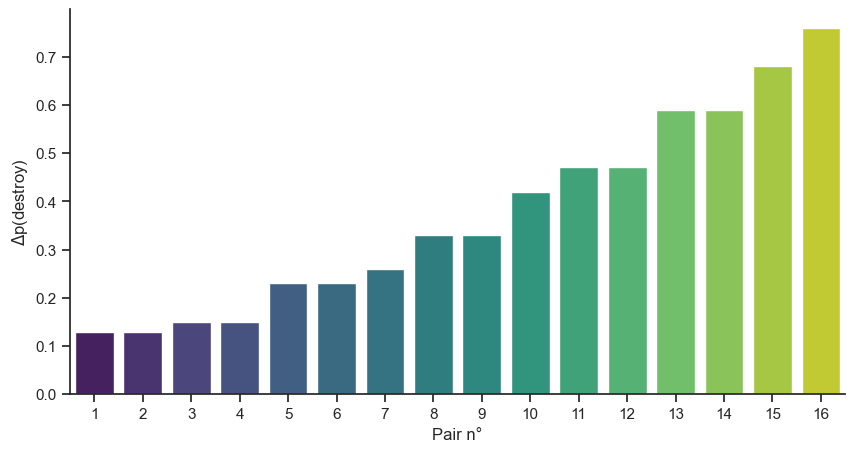

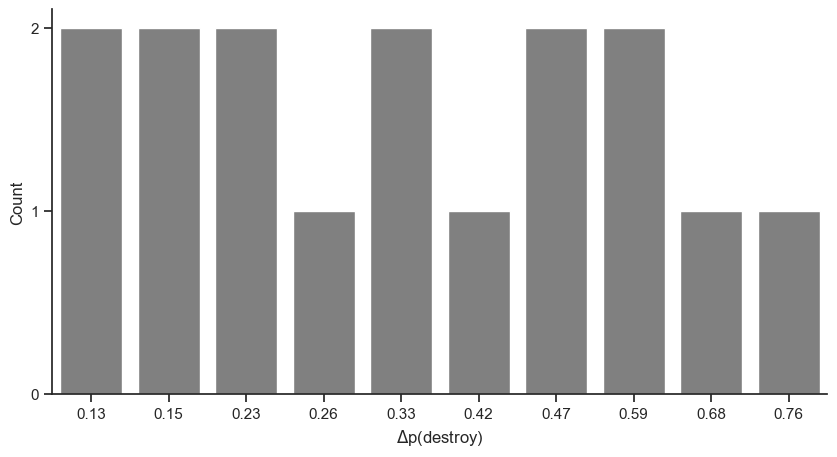

[0.16 0.29 0.71 0.84 0.22 0.37 0.63 0.78 0.55 0.45 0.88 0.12] [3 3 3 3 2 3 3 2 2 2 3 3]


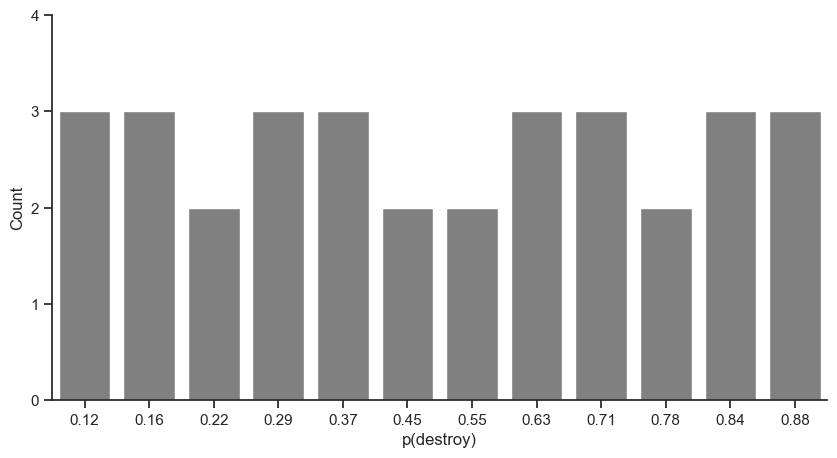

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

pairs = [
 [0.16, 0.29],
 [0.71, 0.84],
 [0.22, 0.37],
 [0.63, 0.78],
 [0.55, 0.78],
 [0.22, 0.45],
 [0.37, 0.63],
 [0.55, 0.88],
 [0.12, 0.45],
 [0.29, 0.71],
 [0.16, 0.63],
 [0.37, 0.84],
 [0.12, 0.71],
 [0.29, 0.88],
 [0.16, 0.84],
 [0.12, 0.88]
]

 
pairs = np.array(pairs)
np.abs(pairs[:, 0] - pairs[:, 1])

# print delta as a nice seaborn plot
sns.set(style="ticks")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=np.arange(16)+1, y=np.abs(pairs[:, 0] - pairs[:, 1]), palette="viridis")
ax.set(xlabel='Pair n°', ylabel='$\\Delta$p(destroy)')
sns.despine()
plt.show()

# delta count (hist)
sns.set(style="ticks")
plt.figure(figsize=(10, 5))
x0 = np.round(np.abs(pairs[:, 0] - pairs[:, 1]),2)
x = list(Counter(x0).keys())
y = list(Counter(x0).values())
ax = sns.barplot(x=np.unique(x0), y=y, color='grey')
ax.set(xlabel='$\\Delta$p(destroy)', ylabel='Count')
# plt.xticks(np.unique(x0))
plt.yticks([0, 1, 2])
sns.despine()
plt.show()

# p(destroy) count (hist)
plt.figure(figsize=(10, 5))
from collections import Counter
x = np.asarray(list(Counter(pairs.flatten()).keys()))
y = np.asarray(list(Counter(pairs.flatten()).values()))
print(x, y)
ax = sns.barplot(x=x, y=y, color='grey')
plt.xlabel('p(destroy)')
plt.ylabel('Count') 
plt.yticks([0, 1, 2,3,4])
sns.despine()
plt.show()




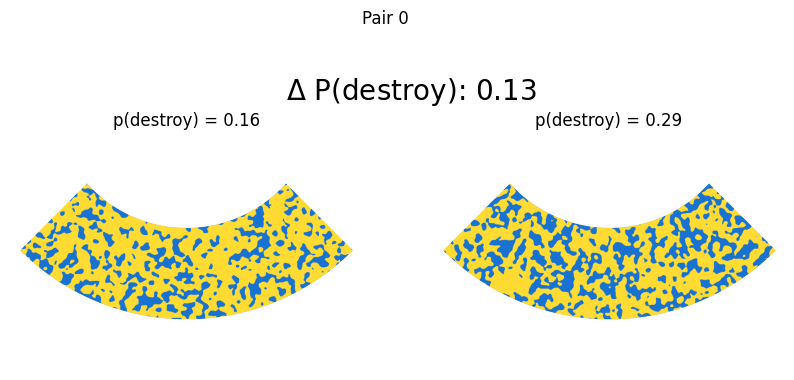

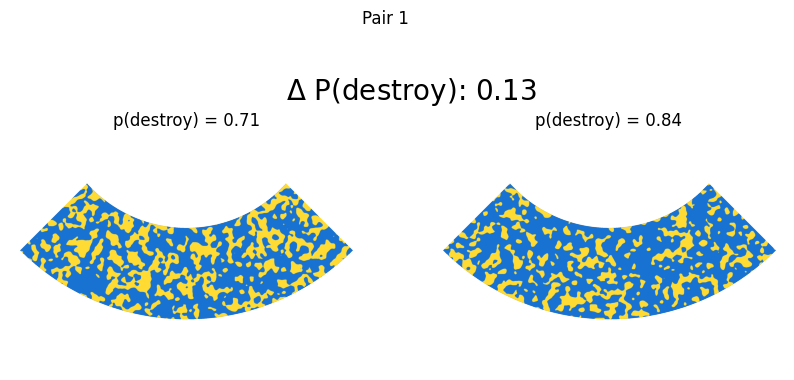

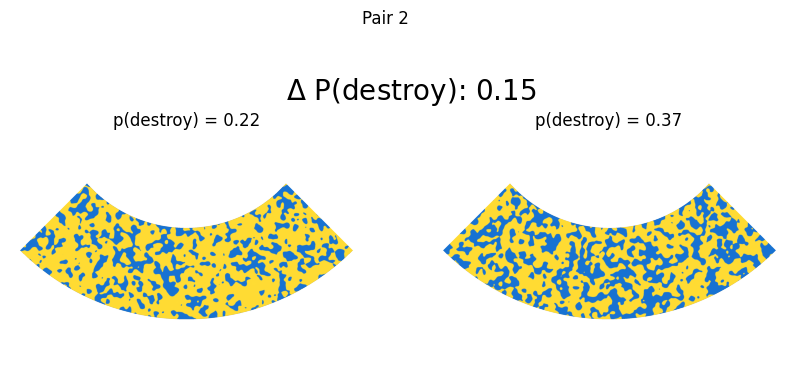

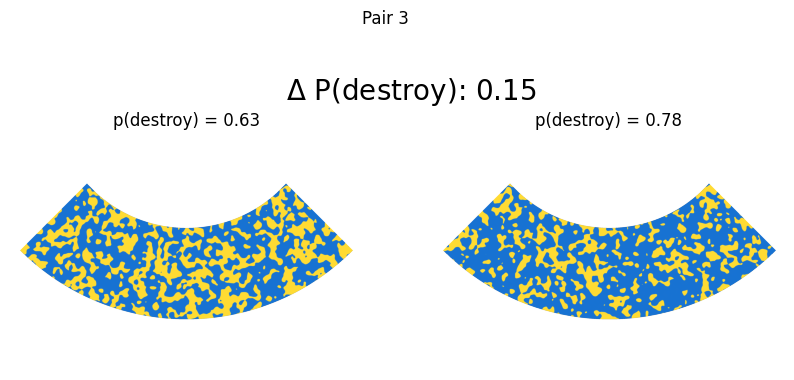

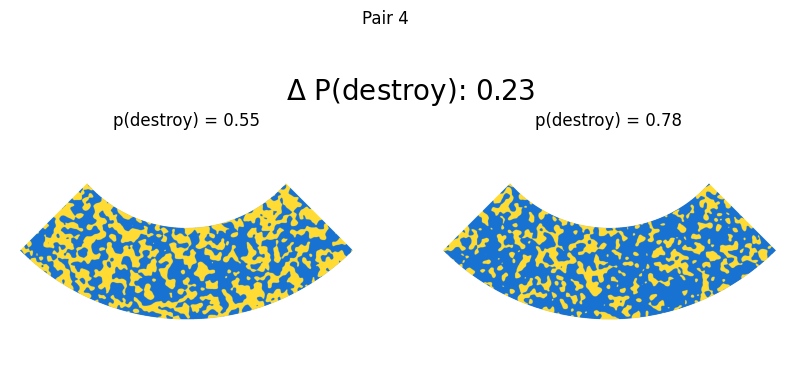

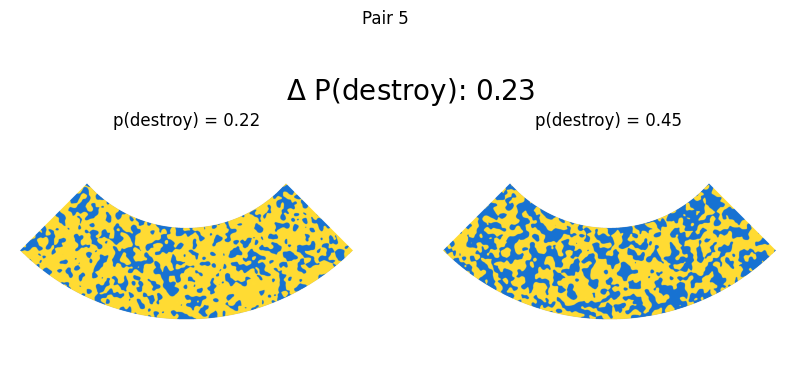

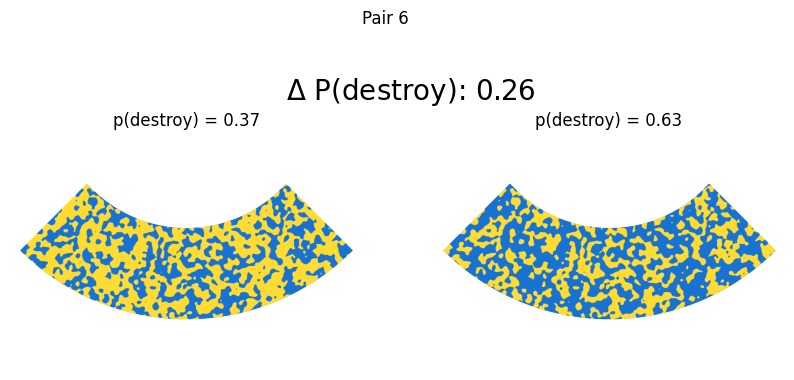

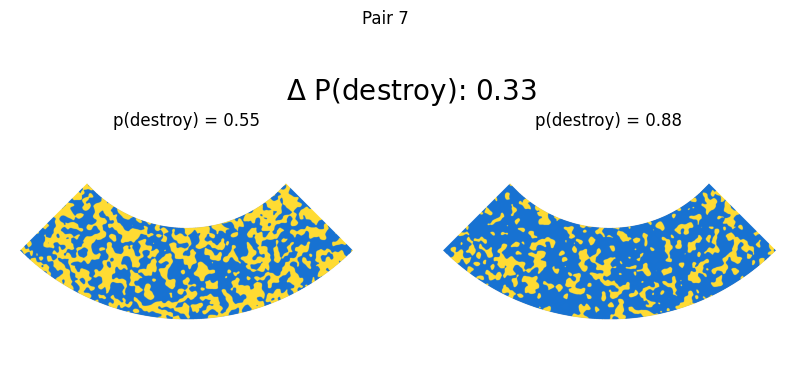

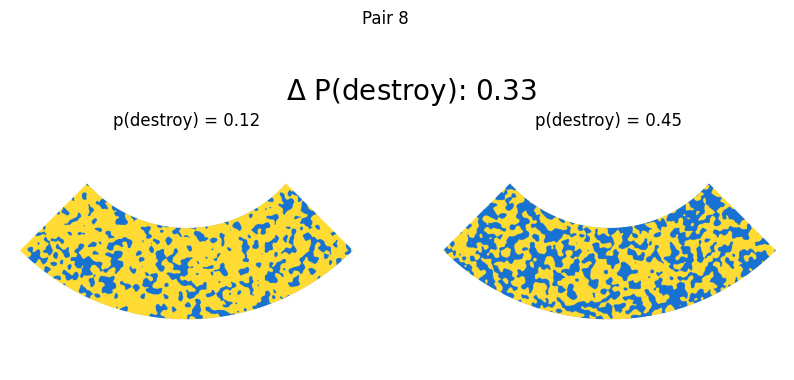

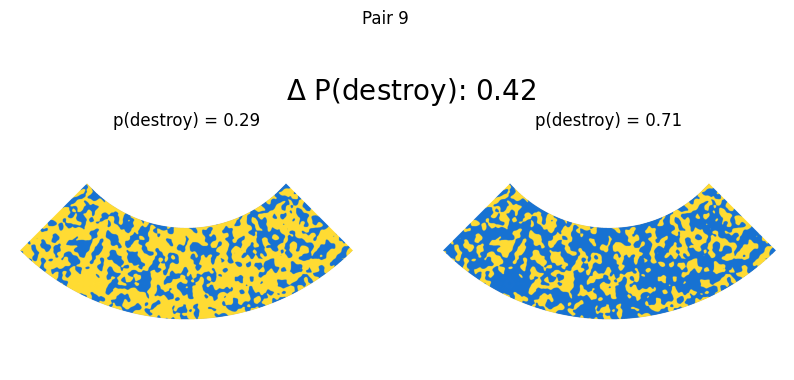

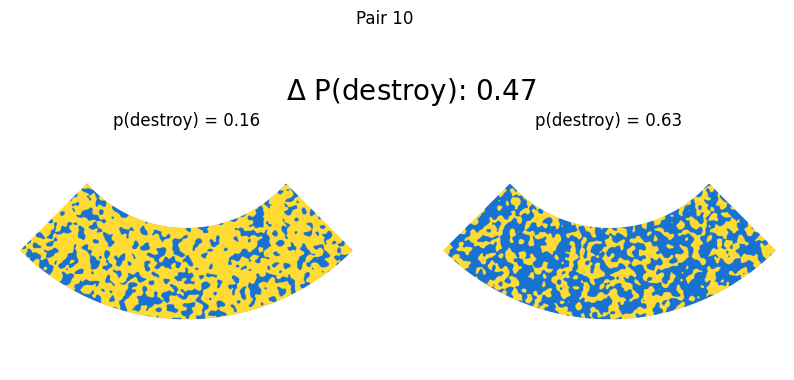

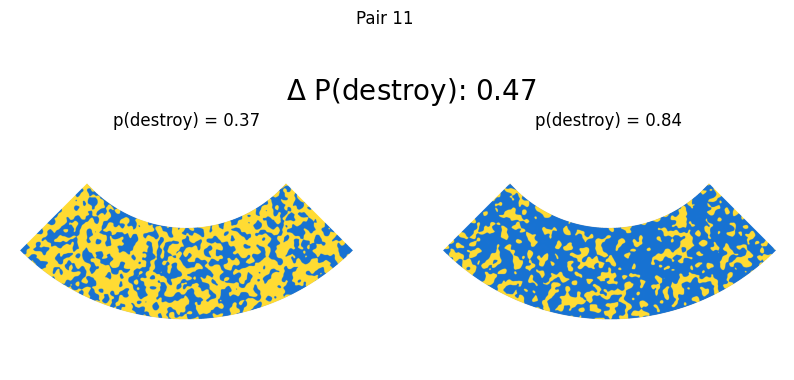

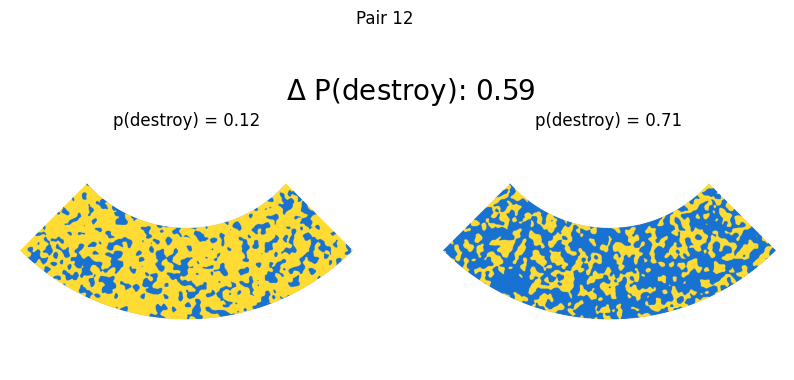

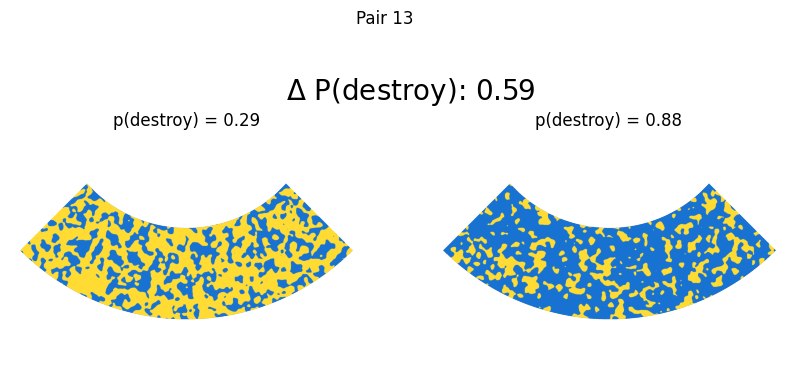

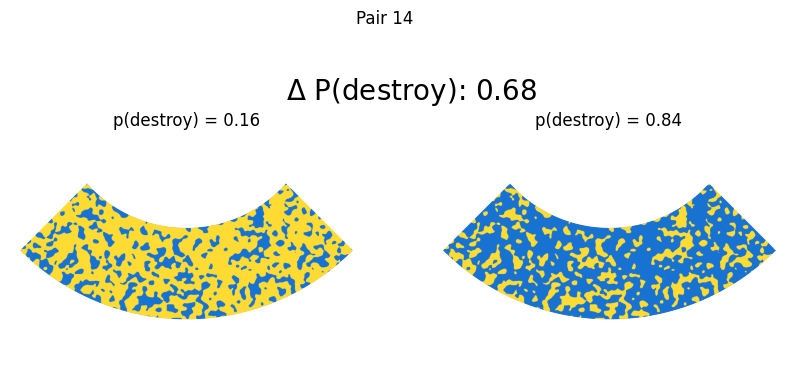

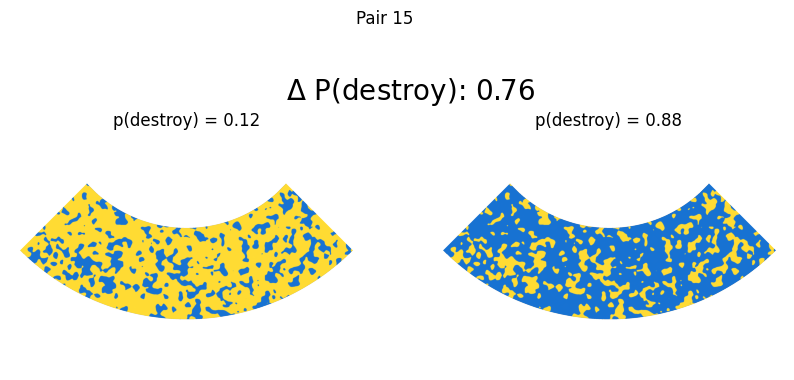

In [46]:
from matplotlib import transforms
import matplotlib.pyplot as plt
import numpy as np
# plot pairs (side by side) in the same plot using cues/value.png
# i.e. 0.78.png, 0.88.png, 0.12.png, 0.22.png, etc.

pairs = [(0.16, 0.29),
 (0.71, 0.84),
 (0.22, 0.37),
 (0.63, 0.78),
 (0.55, 0.78),
 (0.22, 0.45),
 (0.37, 0.63),
 (0.55, 0.88),
 (0.12, 0.45),
 (0.29, 0.71),
 (0.16, 0.63),
 (0.37, 0.84),
 (0.12, 0.71),
 (0.29, 0.88),
 (0.16, 0.84),
  (0.12, 0.88)]

for i, (p1,  p2) in enumerate(pairs[:]):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    image = plt.imread(f'cues/{p1}.png')
    # Define the rotation transformation with translation to center
    tr = (transforms.Affine2D()
      .translate(-image.shape[1] / 2, -image.shape[0] / 2)  # translate to center
      .rotate_deg(45)  # rotate
      .translate(image.shape[1] / 2, image.shape[0] / 2))  # translate back
    transformed_image = plt.imshow(image, transform=tr+plt.gca().transData)
    # Adjust plot limits
    # plt.xlim(0, image.shape[0])
    # plt.ylim(0, image.shape[1])
    extent = transformed_image.get_extent()
    
    plt.xlim(extent[0]-850, extent[1]+850)
    plt.title('p(destroy) = ' + str(p1))
    # Get the extent of the transformed image

    plt.axis('off')

    plt.subplot(122)

    image = plt.imread(f'cues/{p2}.png')
    # Define the rotation transformation with translation to center
    tr = (transforms.Affine2D()
      .translate(-image.shape[1] / 2, -image.shape[0] / 2)  # translate to center
      .rotate_deg(45)  # rotate
      .translate(image.shape[1] / 2, image.shape[0] / 2))  # translate back
    transformed_image = plt.imshow(image, transform=tr+plt.gca().transData)
    # Adjust plot limits
    plt.xlim(-500, image.shape[0]+500)
    plt.ylim(0, image.shape[1])
    
    extent = transformed_image.get_extent()

    # Adjust plot limits
    plt.xlim(extent[0]-850, extent[1]+850)
    plt.ylim(extent[2], extent[3])

    plt.axis('off')
    plt.suptitle(f'Pair {i}')
    plt.title('p(destroy) = ' + str(p2))
    plt.text(-3000, -500, f'$\\Delta$ P(destroy): {np.abs(p1 - p2):.2f}', fontsize=20)
    
    # plt.draw()
    plt.show()


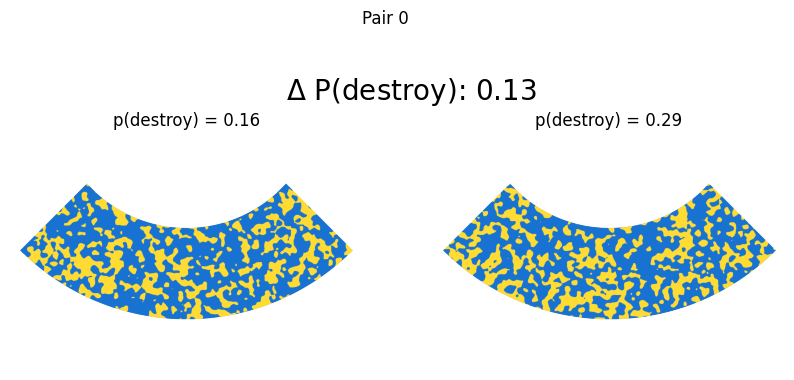

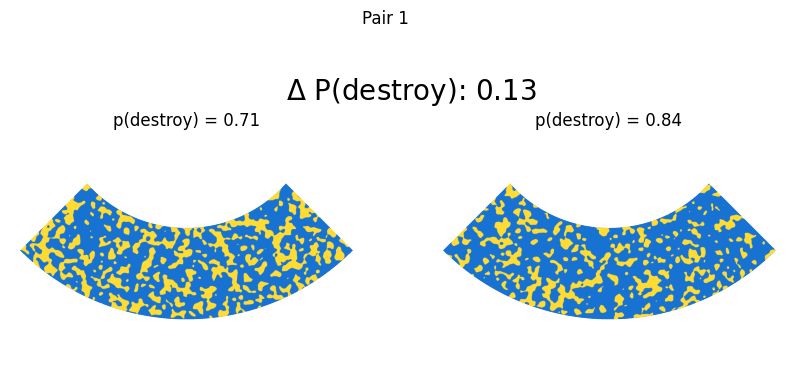

In [10]:
from matplotlib import transforms
# plot pairs (side by side) in the same plot using cues/value.png
# i.e. 0.78.png, 0.88.png, 0.12.png, 0.22.png, etc.

pairs = [
  [0.16, 0.29],
  [0.71, 0.84],
  # [0.63, 0.78],
  # [0.55, 0.71],
  # [0.45, 0.63],
  # [0.37, 0.55],
  # [0.29, 0.45],
  # [0.22, 0.37],
]
# sort pairs by delta
pairs = np.array(pairs)
pairs = pairs[np.argsort(pairs[:, 1] - pairs[:, 0])]

for i, (p1,  p2) in enumerate(pairs):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    image = plt.imread(f'cues/{p1}.png')
    # Define the rotation transformation with translation to center
    tr = (transforms.Affine2D()
      .translate(-image.shape[1] / 2, -image.shape[0] / 2)  # translate to center
      .rotate_deg(45)  # rotate
      .translate(image.shape[1] / 2, image.shape[0] / 2))  # translate back
    transformed_image = plt.imshow(image, transform=tr+plt.gca().transData)
    # Adjust plot limits
    # plt.xlim(0, image.shape[0])
    # plt.ylim(0, image.shape[1])
    extent = transformed_image.get_extent()
    
    plt.xlim(extent[0]-850, extent[1]+850)
    plt.title('p(destroy) = ' + str(p1))
    # Get the extent of the transformed image

    plt.axis('off')

    plt.subplot(122)

    image = plt.imread(f'cues/{p2}.png')
    # Define the rotation transformation with translation to center
    tr = (transforms.Affine2D()
      .translate(-image.shape[1] / 2, -image.shape[0] / 2)  # translate to center
      .rotate_deg(45)  # rotate
      .translate(image.shape[1] / 2, image.shape[0] / 2))  # translate back
    transformed_image = plt.imshow(image, transform=tr+plt.gca().transData)
    # Adjust plot limits
    plt.xlim(-500, image.shape[0]+500)
    plt.ylim(0, image.shape[1])
    
    extent = transformed_image.get_extent()

    # Adjust plot limits
    plt.xlim(extent[0]-850, extent[1]+850)
    plt.ylim(extent[2], extent[3])

    plt.axis('off')
    plt.suptitle(f'Pair {i}')
    plt.title('p(destroy) = ' + str(p2))
    plt.text(-3000, -500, f'$\\Delta$ P(destroy): {np.abs(p1 - p2):.2f}', fontsize=20)
    
    # plt.draw()
    plt.show()


KeyboardInterrupt: 

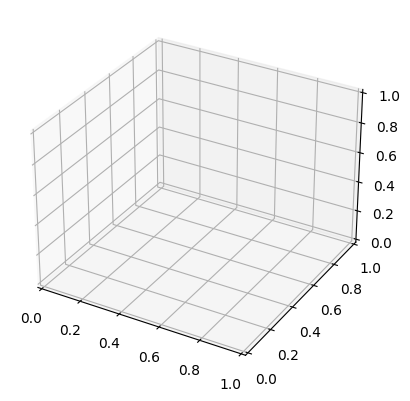

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your PNG image
image = plt.imread('cues/0.12.png')

# Create a meshgrid for x and y
x = np.linspace(0, 1, image.shape[1])
y = np.linspace(0, 1, image.shape[0])
X, Y = np.meshgrid(x, y)

# Z dimension for stacking the image
Z = np.zeros_like(X)

# Create a figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the image as a surface
ax.plot_surface(X, Y, Z, facecolors=image, rstride=1, cstride=1, shade=False)

# Hide the axes
ax.axis('off')

# Show the plot
plt.show()

In [22]:
import cv2
import numpy as np

# Load the circle image
circle_img = cv2.imread("cues/0.12.png", cv2.IMREAD_UNCHANGED)
# Get dimensions of the image
height, width = circle_img.shape[:2]


# Define the thickness of the disc
thickness = 10  # Adjust as needed

# Create an empty canvas for the 3D disc
disc = np.zeros((height, width, 4, thickness), dtype=np.uint8)

# Stack the circle images along the z-axis
for i in range(thickness):
    disc[:, :, :, i] = circle_img[:, :, :]


# Display or save the 3D disc
# For displaying
cv2.imshow('3D Disc', disc)
# cv2.waitKey(100)

# For saving
# for i in range(thickness):
#     cv2.imwrite(f'disc_{i}.png', disc[:, :, i])

# Close OpenCV windows
# cv2.destroyAllWindows()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:124: error: (-215:Assertion failed) bmi && width >= 0 && height >= 0 && (bpp == 8 || bpp == 24 || bpp == 32) in function 'FillBitmapInfo'


In [28]:
cv2.destroyAllWindows()

In [47]:
import cv2
import numpy as np

# Load the circle image
circle_img = cv2.imread("cues/0.12.png", cv2.IMREAD_UNCHANGED)

# Get dimensions of the image
height, width, channels = circle_img.shape

# Define the thickness of the disc
thickness = 300  # Adjust as needed

# Create an empty canvas for the 3D disc
disc = np.zeros((height, width, channels * thickness), dtype=np.uint8)

# Stack the circle images along the z-axis
for i in range(thickness):
    disc[:, :, i * channels:(i + 1) * channels] = circle_img


def write_obj(vertices, output_obj_path='output.obj'):
    with open(output_obj_path, 'w') as obj_file:
        for vertex in vertices:
            obj_file.write(f'v {vertex[0]} {vertex[1]} {vertex[2]}\n')

    print(f'OBJ file saved to {output_obj_path}')

write_obj(disc, 'disc.obj')

OBJ file saved to disc.obj
